# Predicting Diabetes Using XGBoost

This notebook is part of my **early ML learning journey**, following a tutorial from the [Coursera Machine Learning Guided Project](https://coursera.org/share/4c06cda356a9e2d286030460ec852408).  
This is the capstone project.

📌 **About This Notebook:**  
- This was my **first attempt at training a machine learning model**.  
- The tutorial focused on using **XGBoost**, a powerful gradient boosting algorithm, and I followed along to understand how it works.  
- I have added **some of my own notes and minor modifications** to reinforce my understanding.  

💡 **What I Learned:**  
- How to use **XGBoost** for classification problems.  
- The importance of **data preprocessing** before model training.  
- How to evaluate model performance using **accuracy, precision, recall, and AUC-ROC scores**.  

**Note:** This notebook was my **first guided ML project**, and my later projects reflect more independent work and deeper analysis.

## Importing Required Libraries
Below are the libraries used for data handling, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading and Exploring the Dataset
Loading the dataset and exploring its basic properties.

In [3]:
df = pd.read_csv("datasets/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 768 rows and 9 columns


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


#### Visualizations

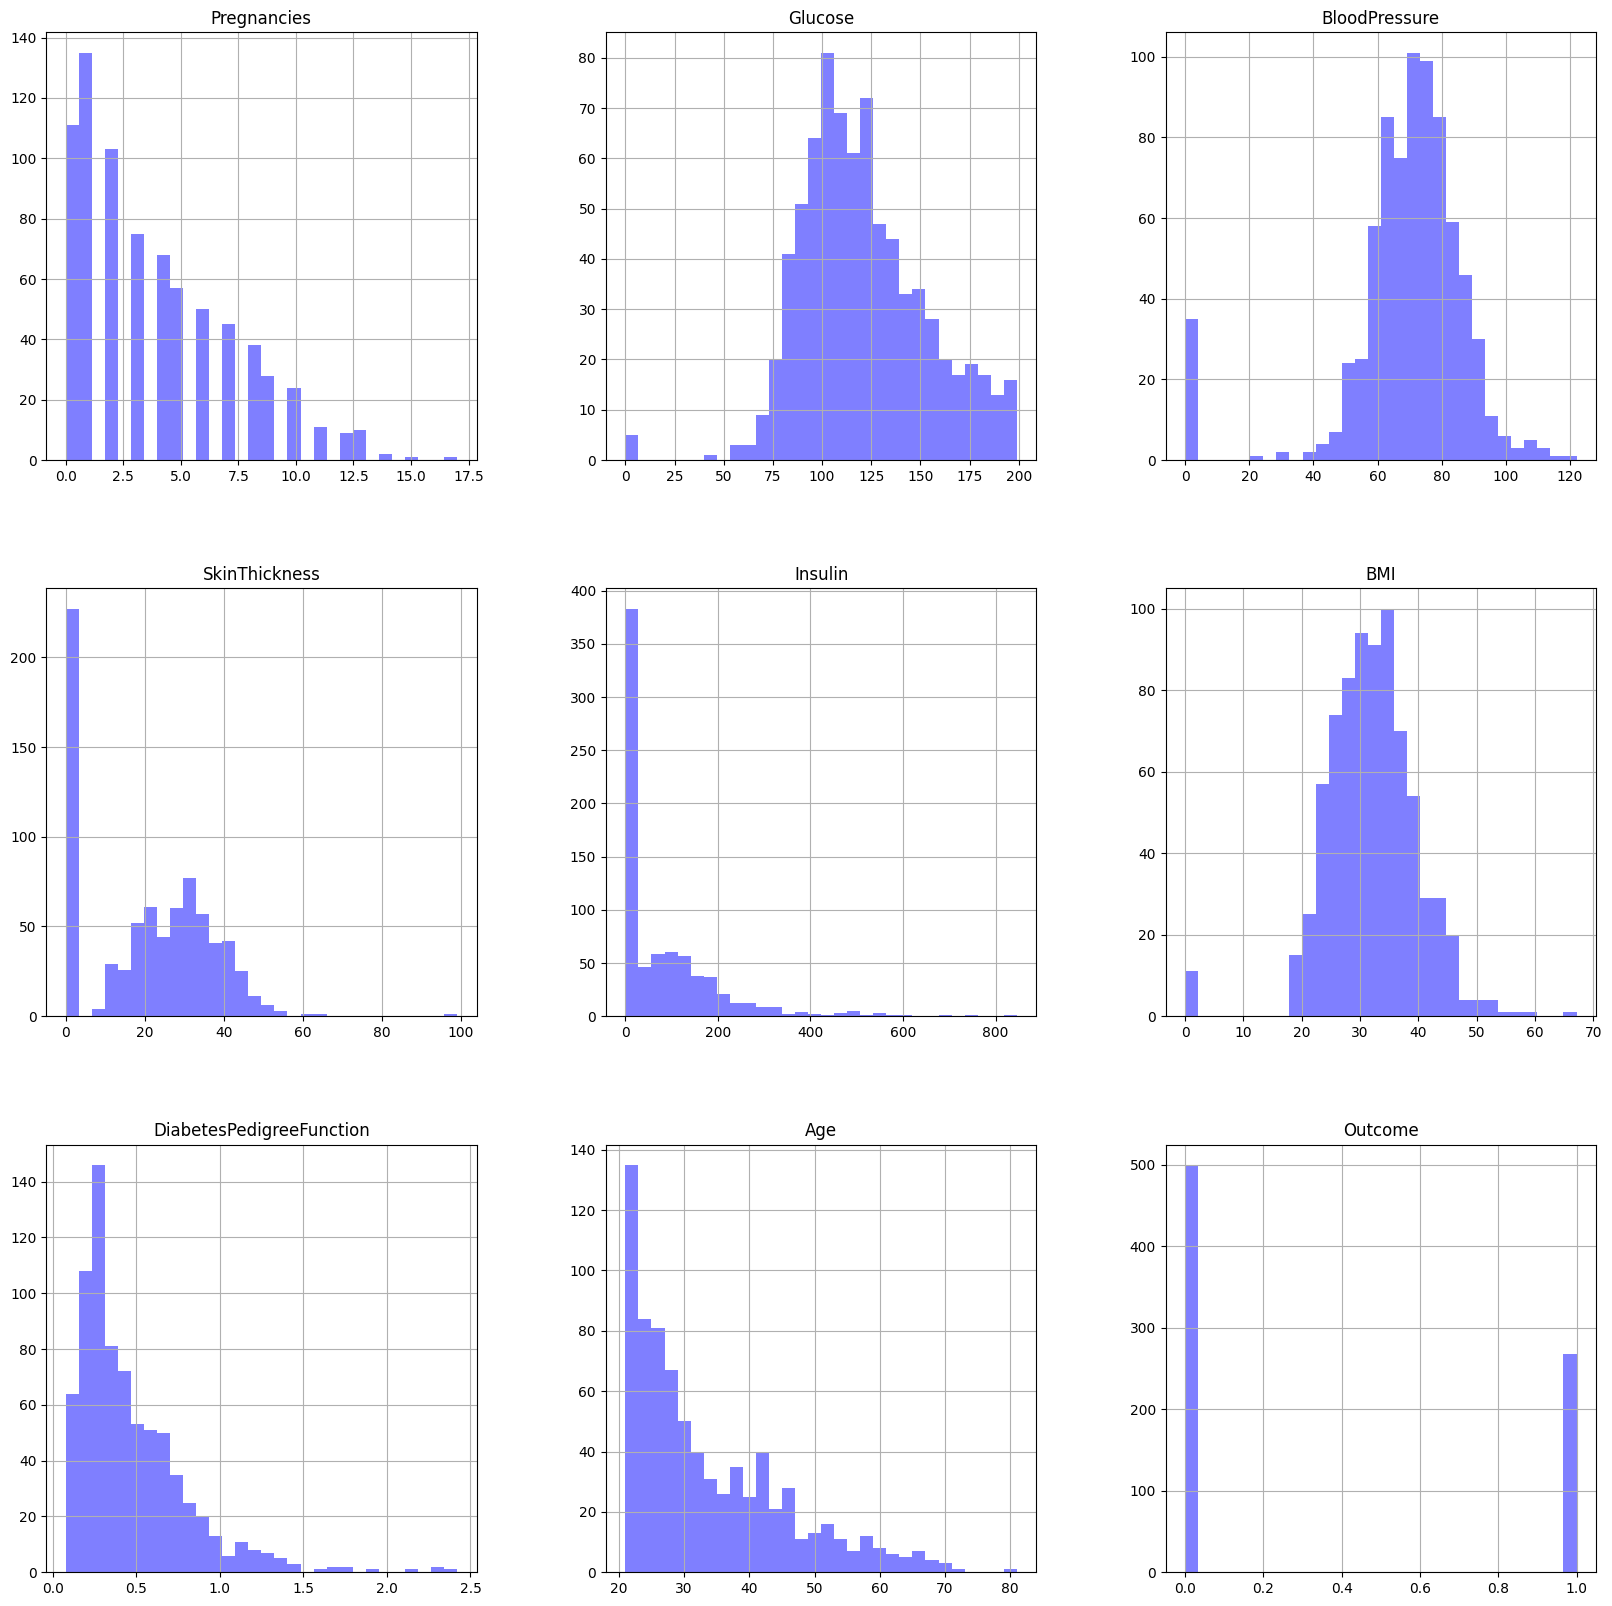

In [17]:
df.hist(bins = 30, figsize = (20,20), color = 'blue', grid=True, alpha = 0.5)
plt.show()

In [20]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


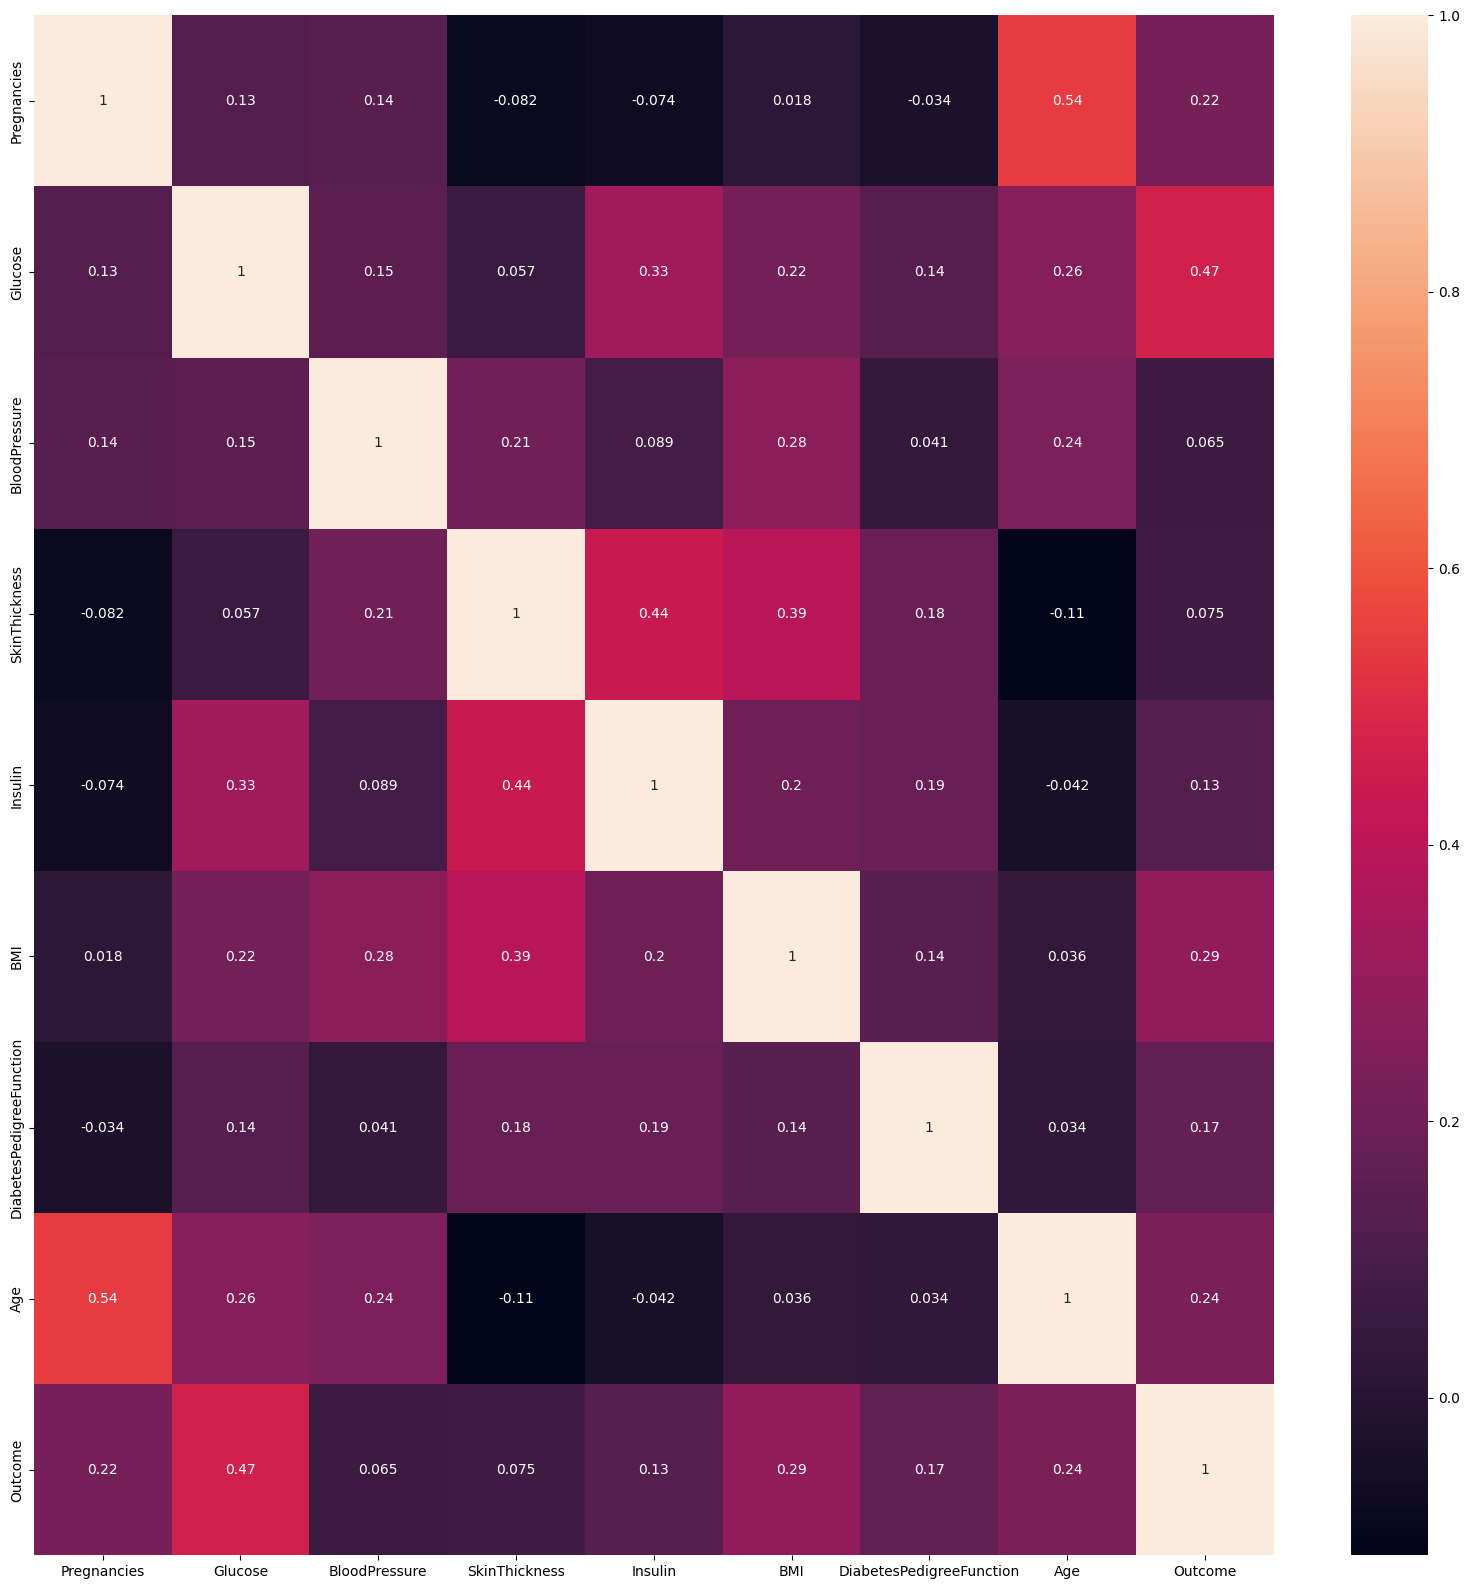

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot = True)
plt.show()

## Splitting Data & Model Training
We split the dataset into training and testing sets and train a simple classification model.

In [26]:
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']       

In [27]:
X.shape, Y.shape

((768, 8), (768,))

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [31]:
from xgboost import XGBClassifier

In [33]:
model = XGBClassifier(objective = 'binary:logistic', 
                          eval_metric = 'error', 
                          learning_rate = 0.01, 
                          max_depth = 10, 
                          n_estimators = 100, 
                          use_label_encoder=False)

model.fit(X_train, Y_train)

C:\Users\eshit\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [02:27:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluating Model Performance
We evaluate the trained model using accuracy, precision, recall, and F1-score.

In [35]:
result = model.score(X_test, Y_test)
print(f"Accuracy: {result}")

Accuracy: 0.7077922077922078


In [38]:
Y_predict = model.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78        99
           1       0.61      0.49      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



<Axes: >

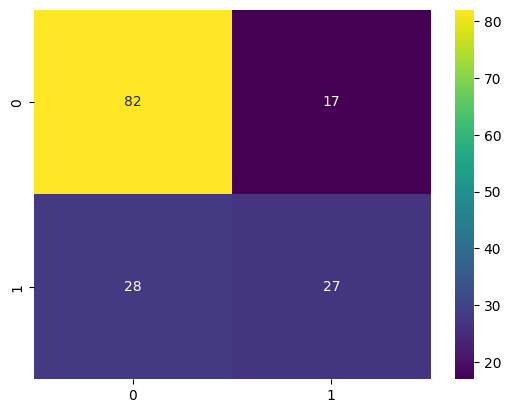

In [40]:
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, fmt = 'd', annot=True, cmap='viridis')